### 

In [1]:
# Used Etherscan.io APIs"


### Import Modules

In [2]:
import requests
import pandas as pd
import numpy as np
import sys
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt

### Load List of Contracts

In [3]:
# Load list from existing dataset
contract = pd.read_csv("../data/ethereum_contracts_with_transaction_amount.csv")

In [4]:
contract[contract['tx_count']==1].shape

(1096965, 2)

In [5]:
contract.tx_count.describe()

count    2.666613e+06
mean     1.347424e+02
std      1.765514e+04
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.029631e+07
Name: tx_count, dtype: float64

C:\Users\zinovyee.hub\AppData\Local\Continuum\miniconda3\envs\dmc\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


Text(0, 0.5, 'Log of the frequency')

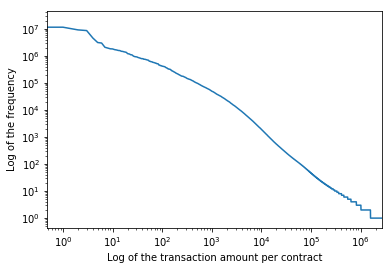

In [6]:
contract.tx_count.plot(loglog=True)
plt.xlabel('Log of the transaction amount per contract')
plt.ylabel('Log of the frequency')

In [7]:
contract = contract[contract['tx_count']>100]


In [8]:
contract.shape

(60371, 2)

In [9]:
contract.drop_duplicates(inplace=True)

In [10]:
contract.drop_duplicates('address', inplace=True)

### Constants


In [11]:
with open("token.txt") as file:  
    API_Token = file.read() 

In [12]:
ADDRESS_ARRAY = contract.address.values

In [13]:
ADDRESS_ARRAY

array(['0xdac17f958d2ee523a2206206994597c13d831ec7',
       '0x8d12a197cb00d4747a1fe03395095ce2a5cc6819',
       '0x174bfa6600bf90c885c7c01c7031389ed1461ab9', ...,
       '0x24e69002f1f266f51fabac9cb576d12812c35e50',
       '0x6b58bd5502913053c92f0ae4fc817fb5dac7bfe3',
       '0x392a5dbfa283b8230c4a8f0f0c1582d867e79046'], dtype=object)

### Create Folders

In [14]:
ABI = '../data/ABI'
sol_source = '../data/sol_source'
full = '../data/full'

In [69]:
if not os.path.exists(ABI):
    os.mkdir(ABI)
if not os.path.exists(sol_source):
    os.mkdir(sol_source)
if not os.path.exists(full):
    os.mkdir(full)

### Function to call the API

In [34]:
files_in_sol = os.listdir(f"../data/sol_source/")
files_in_sol = [i.split('_')[0] for i  in files_in_sol]
files_in_sol = set(files_in_sol)

In [49]:
def scrape_ether_contract_and_write(address_array, API_Token):
    c = 0
    for i, address in enumerate(address_array):
        if i%1000==0:
                    print(i)
        if address in files_in_sol:
            continue
        else: 
            # time.sleep(0.01) # we can do 5 GET/POST requests per sec
        url = f'https://api.etherscan.io/api?module=contract&action=getsourcecode&address={address}&apikey={API_Token}'
        resp = requests.get(url=url)
        data = resp.json()
        try:
            contract_name = data['result'][0]['ContractName']


            # save full GET request
            with open(f"../data/full/{address}_{contract_name}.sol", "w", encoding="utf-8") as d:
                print(data, file=d)  


            # save solidity source code
            with open(f"../data/sol_source/{address}_{contract_name}.sol", "w", encoding="utf-8") as f:
                print(data['result'][0]['SourceCode'], file=f)

            # save ABI compiled version
            with open(f"../data/ABI/{address}_{contract_name}.sol", "w", encoding="utf-8") as d:
                print(data['result'][0]['ABI'], file=d)

        except:
            c += 1
            time.sleep(0.25)
                    
    print(f'did not work {c} times')

### Function Call

In [102]:
scrape_ether_contract_and_write(address_array=ADDRESS_ARRAY, API_Token=API_Token, df=df)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
did not work 1241 times
